# Homework 4
## Part 2 *(12 points)*

When solving some problem with deep learning in practice, you search the Web for the latest paper on that problem, and take its implementation from GitHub. However, often authors won't publish code, so being able to **reimplement a paper** is a vital skill. You will likely have to do it in your course project.

In this assignment, we'll simulate reimplementing a paper (in a greatly simplified environment though). As in many papers, some details of the system may be omitted so you'll have to leverage intuition and guess.

Remember that there's already some great intuition on the Web (similar papers, Reddit, GitHub...). For example, if you have difficulties optimizing Transformer, it's not just you: googling "*transformer training diverges*" will show discussions and even papers just on Transformer training tricks. Still, **cite any foreign code** that you use (although this time you'll likely won't need any).

## Problem

In this part, you'll create an out-of-the-box text-to-speech (**TTS**) system:

![](https://user-images.githubusercontent.com/9570420/81783573-392ed600-9504-11ea-98da-86ac05457c29.png)

## Task

**Reimplement and train the TTS system defined in "*Method*" and write a report.**

### Deliverables

1. `part2_solution.py`
1. `TTS.pth` (uploaded to Drive as in the assignment №2)
1. `report.pdf`

### Expected Results

* "Run All" must work without errors with both `DO_TRAIN = True` and `DO_TRAIN = False`.
* The implementation **must agree with everything in "*Method*"**.
* There should be more of tone/intonation and less of "metallic"/"tin sounding"/"robotic" voice.
* [train](https://drive.google.com/file/d/1xjF47mSQ-1XkvxM4emubpCkDSJHKZHcr/view?usp=sharing), [validation](https://drive.google.com/file/d/18yTzSpYA1PKeswuyUowTPMXvX7azYnZA/view?usp=sharing) — examples of insufficient quality.
* [train](https://drive.google.com/file/d/1W72htJ1NVmS-mvaVDqINUIVzGWhD8ScR/view?usp=sharing), [validation](https://drive.google.com/file/d/1KDiP4KQCJJpsf-Q_NZnwY7jck2QHeihx/view?usp=sharing) — aim to have at least this quality at 13 000 training iterations. For full marks, your audios should be no worse than this.
* [train](https://drive.google.com/file/d/1ZyGEE8Whvs89ojSRiqkaMi82owiPHQmk/view?usp=sharing), [validation](https://drive.google.com/file/d/1dcdCxTKcCSy8I6EeU-aXJdyLcC3xLp2K/view?usp=sharing) — if you got this or better (note how smooth now are the words "arrogance and hostility"), you're awesome! Provided great patience, expect something like this at 35 000 iterations. This isn't obligatory, but still is a great achievement and guarantees "passing the quality check".
* Sorry, it's hard to come up with formal assessment criteria for audio samples. We'll rely on common sense.

### Report

* Explain some worst bugs that you had to fix.
* Tell your story of training runs. **Attach screenshots of loss curves.** How many runs in total have you done? What was the longest one? Did you have to use optimization tricks/heuristics/magic from the Web?
* Was it easy to obtain the required audio quality? Do you think the best model could improve if trained for longer?
* For you personally, what were the **top 3 hardest things** in this assignment? (name anything, even "*waiting to be unblocked on Colab*")
* What have you learned while doing this task?
* What questions of yours has this task provoked? E.g. "I was curious if Transformers are used in X" or "I'm wondering if real papers really don't mention Y".
* How would you improve this assignment?

## Data

 Intuitively, in the real world your dataset would be a set of pairs:

* Input:
  * `text` *(string)*.
* Target:
  * raw audio of a person saying `text` *(array of amplitude values sampled e.g. 44100 times per second — see an example plotted above)*.

However, you'll deal with a simplified dataset. One dataset sample is an utterance described by

* Input:
  * list of [ARPAbet phonemes](http://www.speech.cs.cmu.edu/cgi-bin/cmudict#phones);
  * *phoneme alignment*, i.e. start time and duration for each phoneme.
* Target:
  * [mel spectrogram](https://pytorch.org/audio/stable/transforms.html#melspectrogram) (frequency representation of audio) of a person saying text.

![image](https://user-images.githubusercontent.com/9570420/81795777-2a9cea80-9515-11ea-99eb-05915f803af1.png)

In [1]:
# Download extra stuff

from pathlib import Path

# Dataset (2.2 GB download, needs ~5 GB of disk space)
if not Path("./LJ-Speech-aligned/").is_dir():
    !gdown --id "13ObzCKsQHPqTc_aJk_m4NsMW3ljs0okI"
    if not Path("./LJ-Speech-aligned.zip").is_file():
        print("\n\nCouldn't download from Google Drive, trying OneDrive\n\n")
        !wget -O "LJ-Speech-aligned.zip" "https://eduhseru-my.sharepoint.com/:u:/g/personal/eaburkov_edu_hse_ru/EbZTIu-yUdJJpWxuMmmOh88Bt8Q5tcv_wqUK7YJLs-EBxA?e=caQfgB&download=1"

    !unzip -q LJ-Speech-aligned.zip && rm LJ-Speech-aligned.zip

# Code to work with that dataset
if not Path("./lj_speech.py").is_file():
    !gdown --id 1k2wCeMkHqRUzkAsEnV1eq7EpzZ6wIyr1

# Deep learning software that converts spectrograms to audio
if not Path("./waveglow/").is_dir():
    !git clone --recursive https://github.com/shrubb/waveglow.git -b denoiser-fix

if not Path("./waveglow_256channels_ljs_v2.pt").is_file():
    !wget -c https://api.ngc.nvidia.com/v2/models/nvidia/waveglow_ljs_256channels/versions/2/files/waveglow_256channels_ljs_v2.pt

Downloading...
From: https://drive.google.com/uc?id=13ObzCKsQHPqTc_aJk_m4NsMW3ljs0okI
To: /content/LJ-Speech-aligned.zip
2.09GB [00:14, 143MB/s]
Downloading...
From: https://drive.google.com/uc?id=1k2wCeMkHqRUzkAsEnV1eq7EpzZ6wIyr1
To: /content/lj_speech.py
100% 9.53k/9.53k [00:00<00:00, 17.6MB/s]
Cloning into 'waveglow'...
remote: Enumerating objects: 179, done.
remote: Total 179 (delta 0), reused 0 (delta 0), pack-reused 179
Receiving objects: 100% (179/179), 433.24 KiB | 12.03 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Submodule 'tacotron2' (https://github.com/shrubb/tacotron2.git) registered for path 'tacotron2'
Cloning into '/content/waveglow/tacotron2'...
remote: Enumerating objects: 399, done.        
remote: Total 399 (delta 0), reused 0 (delta 0), pack-reused 399        
Receiving objects: 100% (399/399), 2.69 MiB | 17.23 MiB/s, done.
Resolving deltas: 100% (202/202), done.
Submodule path 'tacotron2': checked out 'ed0f02bda932e6ab17f8f4b034ac26767a6a7a50'
--2021-05-10 1

Use this Python module to handle our dataset. It's documented, so when in doubt, use `help()` or read the code with `??lj_speech`.

There are also some useful constants, check them with `?lj_speech`.

In [2]:
import lj_speech

`import listener` failed, trying to install by '/usr/bin/python3 -m pip install git+https://github.com/shrubb/listener.git'...


In [3]:
DATASET_ROOT = Path("./LJ-Speech-aligned/")
train_dataset, val_dataset = lj_speech.get_dataset(DATASET_ROOT)

Here is an example datapoint:

Datasets yield: text, phonemes_start, phonemes_duration, phonemes_code, spectrogram
Text: 'sometime after march twenty-seven, but according to marina oswald, prior to april ten, nineteen sixty-three,'
Phonemes: 'S AH1 M T AY1 M AE1 F T EU0 R M AA1 R CH T W EH1 N T IY0 S EH1 V AH0 N pau pau B AH1 ...'


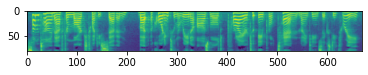

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

example_datapoint = train_dataset[666]
print(f"Datasets yield: {', '.join(example_datapoint.keys())}")
print(f"Text: '{example_datapoint['text']}'")
print(f"Phonemes: '{' '.join(example_datapoint['phonemes_code'][:30])} ...'")
plt.imshow(example_datapoint['spectrogram']);

To "play" spectrograms, including those that you will generate, we will use another deep learning algorithm called [WaveGlow](https://arxiv.org/abs/1811.00002). It converts mel spectrograms to audio.

Fortunately, there *is* code for it on GitHub, so you won't have to reimplement it 🙂 Still, when you have free time, I encourage you to watch a short [video](https://www.youtube.com/watch?v=CqFIVCD1WWo) about WaveNet — the famous paper that WaveGlow is based on.

In [5]:
vocoder = lj_speech.Vocoder()

print(example_datapoint['text'])

example_spectrogram = example_datapoint['spectrogram']
audio = vocoder(example_spectrogram)
lj_speech.play_audio(audio)

sometime after march twenty-seven, but according to marina oswald, prior to april ten, nineteen sixty-three,


In [6]:
del vocoder # free GPU memory

Finally, we have phonemes as inputs, but we'd like to synthesize arbitrary text. For that, there is `lj_speech.text_to_phonemes(text)`.

In [7]:
lj_speech.text_to_phonemes("I love you")

[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


['AY1', 'L', 'AH1', 'V', 'Y', 'UW1']

## Method

![pipeline](https://user-images.githubusercontent.com/9570420/116498026-73c68580-a8b1-11eb-927d-2605755814aa.png)

### Architecture

**Encoder** converts raw phonemes to their representations that include context. It's inspired by [this paper](https://arxiv.org/abs/1910.10352) and is a stack of Transformer encoder layers and convolutions. In contrast to that paper, we don't use layer normalization; instead, we replace 1D convolution with full residual blocks where batch normalization is done. We use additive learned positional encoding.

**Duration model** takes encoder's rich phoneme representations and predicts the duration of each phoneme in spectrogram frames. It's a a recurrent network that's trained independently and only after the rest of the system has been trained.

**Alignment model** "upsamples" phoneme embeddings according to their durations to match the output spectrogram shape. It employs Gaussian upsampling introduced in ["Non-Attentive Tacotron"](https://arxiv.org/abs/2010.04301) (section 3.1). The difference is that we learn the single $\sigma$ for all inputs, and we compute PDFs at a more natural $t+0.5$ rather than at $t$.

**Decoder** starts identical to encoder — with multi-head attention and convolutional blocks interleaved — except the smaller dropout rate. We even inject positional encodings again because the sequence length is now different and has a new meaning. After that, we predict the final spectrogram, imposing supervision at this point already. However, we found out that learnable post-processing greatly benefits quality, so we run the *post-processing network* that predicts a correction (residual) to be added to the above spectrogram. As a result, the output is supervised with a combination of two losses.

### Implementation Details

* It's important to not compute loss on the padded parts (both for spectrograms and durations) and to average it properly afterwards.
* Outputs and targets, especially durations, can take values uncomfortable for the neural network which can lead to poor quality of divergence. Therefore, they need to be carefully normalized.
* Recurrent nets and transformers tend to be unstable in training. It's important to [clip gradients](https://pytorch.org/docs/stable/nn.html#torch.nn.utils.clip_grad_norm_), use a suitable learning rate schedule (like "Noam warmup" for Transformers) and possibly employ other common tricks.
* For speed, it's critical that Gaussian sampling implementation is fully vectorized, i.e. **all** parts of it run on GPU and don't use Python loops.
* Because for one phoneme sequence there can be many correct spectrograms, pointwise spectrogram loss isn't fully representative of actual audio quality. We have noticed that even if the validation loss increases, the quality may still improve.

## Tips

* Track failures early. Stop bad experiments early. Test one new thing at once.
* Don't use code from part 1, use built-in PyTorch Transformer blocks.
* Large batches aren't always good. Especially if you have a tight deadline and Colab time limits.
* Send audio to TensorBoard (or whatever is your favourite logging tool).
* If you're on a GPU that natively supports mixed precision training (e.g. T4, P100, V100, RTX, GTX 16), you're lucky. Mixed precision training is built into PyTorch and speeds training up almost for free.
* Batches of too uneven lengths waste computations on padded parts. The technique known as "bucketing" can help.

In [ ]:
# Your solution
%load_ext autoreload
%autoreload 1

%aimport part2_solution

In [ ]:
# If `True`, will train the model from scratch.
# If `False`, instead of training will load weights from './TTS.pth'.
# When grading, we will test both cases.
DO_TRAIN = True

In [ ]:
if DO_TRAIN:
    !rm -f TTS.pth

    # Train from scratch for one epoch (to check that your training works)
    # and save the best model to "./TTS.pth"
    part2_solution.train_tts(DATASET_ROOT, num_epochs=1)
else:
    # Download the checkpoint and initialize model weights from it
    import urllib
    import subprocess

    penalize = False

    # Get your link and checksum
    claimed_md5_checksum, google_drive_link = part2_solution.get_checkpoint_metadata()

    # Use your link to download "TTS.pth"
    !gdown --id {urllib.parse.urlparse(google_drive_link).path.split('/')[-2]}

    try:
        # Compute the actual checksum
        real_md5_checksum = subprocess.check_output(
            ["md5sum", "TTS.pth"]).decode().split()[0]
    except subprocess.CalledProcessError as err:
        # Couldn't download or the filename isn't "TTS.pth"
        print(f"Wrong link or filename: {err}")
        penalize = True
    else:
        # The trained checkpoint is different from the one submitted
        if real_md5_checksum != claimed_md5_checksum:
            print("Checksums differ! Late submission?")
            penalize = True

    if penalize:
        raise ValueError("🔫 Prepare the penalizer! 🔫")

# Finally load weights
tts_synthesizer = part2_solution.TextToSpeechSynthesizer("./TTS.pth")

In [ ]:
phonemes = "DH IH1 S pau pau pau IH1 Z pau pau pau S P AH1 R T AH1 AH1 AH1 pau".split()
lj_speech.play_audio(
    tts_synthesizer.synthesize_from_phonemes(phonemes))

In [ ]:
text = "Pack my box with five dozen liquor jugs."
# text = "The five boxing wizards jump quickly."
# text = "The quick brown fox jumps over the lazy dog."
# text = "How about some school tech."
# text = "Last homework. We are in a deep trouble. No sleep tonight."

lj_speech.play_audio(
    tts_synthesizer.synthesize_from_text(text))